# Financial Data Analysis Project 

In this data project we will focus on exploratory data analysis of stock prices. The point of this project is to exercise my exploratory analysis, visualization and over all pandas skillz. We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from the Quandl API using pandas!

First we need to start with the proper imports, which we've already laid out for you here.


### The Imports


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import quandl
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Data

We need to get data using the Quandl API. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.

** Use [this documentation page](https://docs.quandl.com/) for themost up to date hints and instructions on how to interact with Quandl's API. What I have hear might not still be the correct syntax bythe time you get to it.**

In [4]:
#quandl.ApiConfig.api_key = 'INSERT-YOURS'
#quandl.ApiConfig.api_version = '2015-04-09'
#Save key
#quandl.save_key('INSERT-YOURS')
quandl.read_key()



# Bank of America
BAC = quandl.Dataset('WIKI/BAC').data(params={ 'start_date':'2006-01-01', 'end_date':'2016-01-01'}).to_pandas()[['Open','High','Low','Close','Volume']]
# Citigroup
C = quandl.Dataset('WIKI/C').data(params={ 'start_date':'2006-01-01', 'end_date':'2016-01-01'}).to_pandas()[['Open','High','Low','Close','Volume']]
# Goldman Sachs
GS = quandl.Dataset('WIKI/GS').data(params={ 'start_date':'2006-01-01', 'end_date':'2016-01-01'}).to_pandas()[['Open','High','Low','Close','Volume']]
# JP Morgan Chase
JPM = quandl.Dataset('WIKI/JPM').data(params={ 'start_date':'2006-01-01', 'end_date':'2016-01-01'}).to_pandas()[['Open','High','Low','Close','Volume']]
# Wells Fargo
WFC = quandl.Dataset('WIKI/WFC').data(params={ 'start_date':'2006-01-01', 'end_date':'2016-01-01'}).to_pandas()[['Open','High','Low','Close','Volume']]
# Morgan Stanley
MS = quandl.Dataset('WIKI/MS').data(params={ 'start_date':'2006-01-01', 'end_date':'2016-01-01'}).to_pandas()[['Open','High','Low','Close','Volume']]



** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC','C','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC,C,JPM,MS,WFC],keys=tickers,axis=1)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                       C                \
Stock Info    Open   High    Low  Close      Volume   Open   High    Low   
Date                                                                       
2006-01-03   46.92  47.18  46.15  47.08  16296700.0  49.00  49.38  48.11   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0  48.86  49.10  48.35   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0  48.44  48.78  48.40   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0  48.88  48.90  48.20   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0  48.60  48.74  48.30   

Bank Ticker                       ...         MS                         \
Stock Info   Close      Volume    ...       Open   High      Low  Close   
Date                              ...                                     
2006-01-03   49.29  15376000.0    ...      57.17  58.49  56.7400  58.31   
2006-01-04   48.38  18709000.0    ...      58.70  59.28  58.3500  58.35   
2006-01-05   48.62  11431000.0    ...      58.55  58.59  58.0200  58.51   
2006-01-06   48.62  13702000.0    ...      58.77  58.85  58.0500  58.57   
2006-01-09   48.39  16807000.0    ...      58.63  59.29  58.6244  59.19   

Bank Ticker               WFC                                  
Stock Info      Volume   Open   High    Low  Close     Volume  
Date                                                           
2006-01-03   5377000.0  63.20  63.95  62.39  63.80  5508200.0  
2006-01-04   7977800.0  63.60  63.64  62.73  63.06  5435000.0  
2006-01-05   5778000.0  63.00  63.11  62.62  62.99  5079000.0  
2006-01-06   6889800.0  63.16  63.55  62.77  63.36  4201900.0  
2006-01-09   4144500.0  63.35  63.65  63.11  63.35  2809800.0  

[5 rows x 25 columns]

# EDA

Let's explore the data! Feel free to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

In [10]:
bank_stocks.xs('Close',axis=1, level='Stock Info').max()

Bank Ticker
BAC    54.90
C      60.34
JPM    70.08
MS     89.30
WFC    73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
for i in tickers:
    returns[i + " Return"] = bank_stocks.xs('Close',axis=1, level='Stock Info').pct_change()[i]

returns.head()
    


BAC Return  C Return  JPM Return  MS Return  WFC Return
Date                                                               
2006-01-03         NaN       NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731    0.016242   0.010586   -0.000158

** Create a pairplot using seaborn of the returns dataframe.**

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


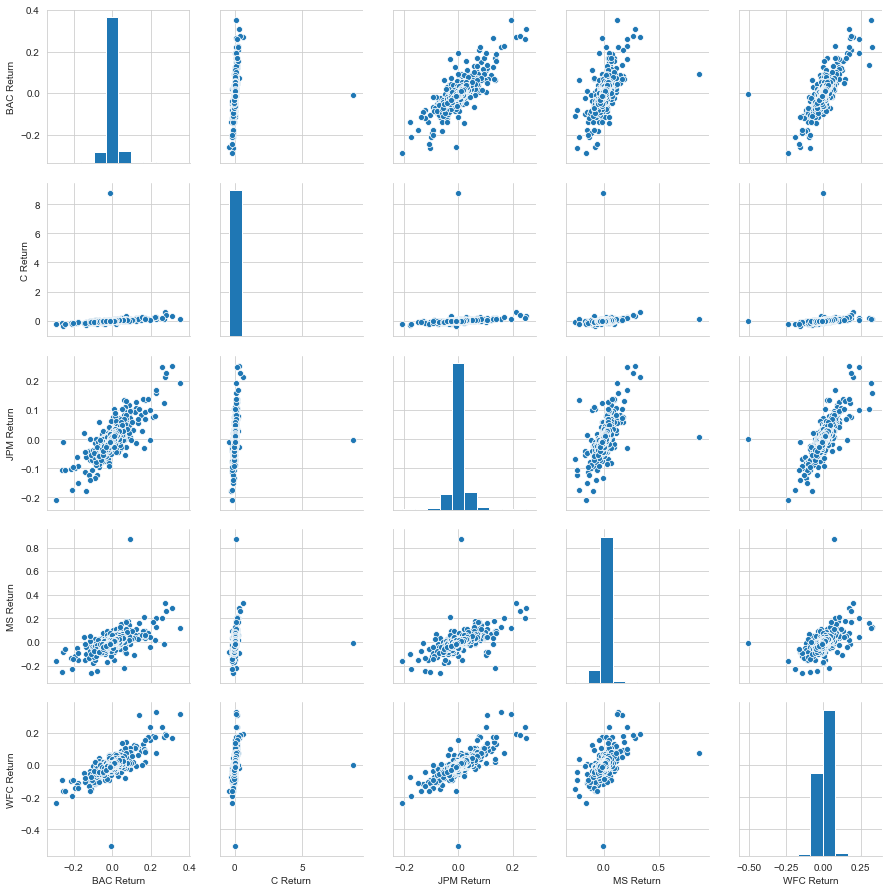

In [13]:
sns.pairplot(returns, palette='coolwarm')

If you'll notice, Citibank has some weird behavior here. Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

Citigroup went through  a stock split. This is whyit's biggest gain and biggest lose were so close to one another

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.std(skipna=None, axis=0)
#Citigroup seems like the riskiest

BAC Return    0.036628
C Return      0.179066
JPM Return    0.027651
MS Return     0.037820
WFC Return    0.031838
dtype: float64

In [17]:
returns['2015-01-01':'2016-01-01'].std()

#JP Morgan

BAC Return    0.016163
C Return      0.015289
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


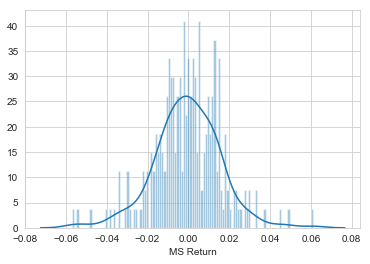

In [18]:
sns.distplot(returns['2015-01-01':'2016-01-01']['MS Return'].dropna(), bins=111)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


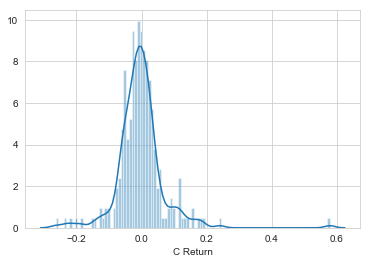

In [19]:
sns.distplot(returns['2008-01-01':'2009-01-01']['C Return'].dropna(), bins=101)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

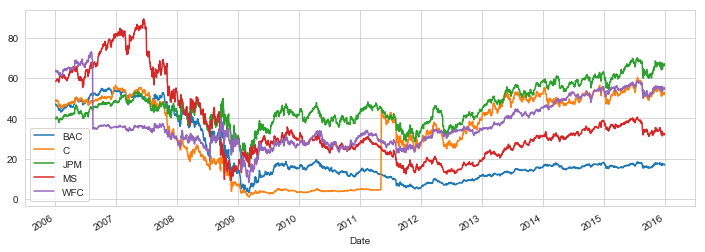

In [21]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

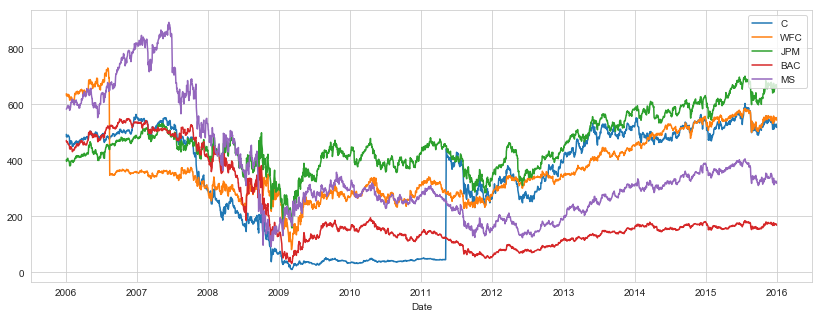

In [22]:
x = bank_stocks.xs('Close',axis=1, level='Stock Info').apply(lambda x : x*10)


fig, axes = plt.subplots(figsize=(14,5))
axes.plot(x.index,x.C)
axes.plot(x.index,x.WFC)
axes.plot(x.index,x.JPM)
axes.plot(x.index,x.BAC)
axes.plot(x.index,x.MS)

axes.set_xlabel('Date')
axes.legend(loc=1)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



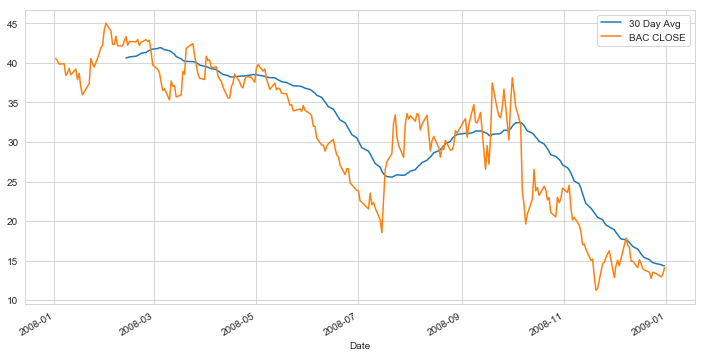

In [23]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

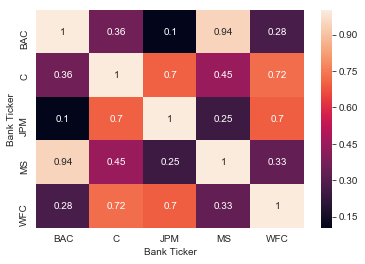

In [24]:
sns.heatmap(x.corr(), annot=True)

** Use seaborn's clustermap to cluster the correlations together:**

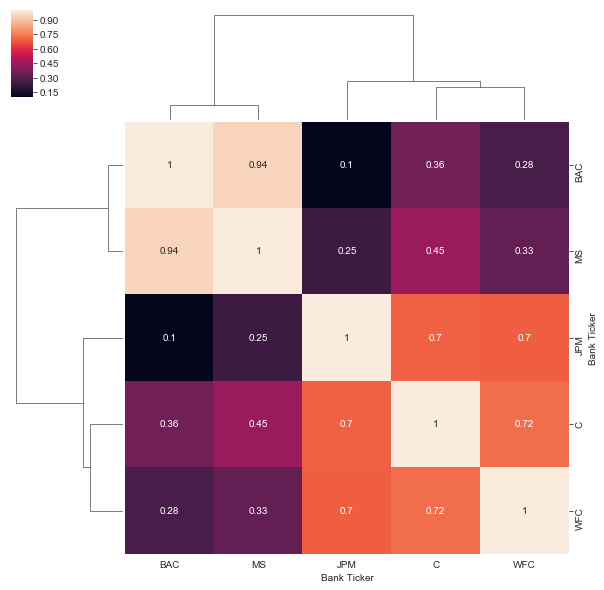

In [25]:
sns.clustermap(x.corr(),annot=True)

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [26]:
bank_stocks['BAC']['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [27]:
bank_stocks['MS']['2015-01-01':'2016-01-01'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [29]:
bank_stocks['BAC']['2015-01-01':'2016-01-01'].ta_plot(study='boll')

Thanks for checking this out! If you have any questions or feedback, feel free to hit me up. :) 